In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os 
import sys
from math import ceil
import numpy as np 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from mnist_cvae import CVAE

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


INPUT_DIM = 28 * 28     # size of each input
HIDDEN_DIM = 784        # hidden dimension
LATENT_DIM = [2,4,8,16,32,64,128,256]         # latent vector dimension
N_CLASSES = 10          # number of classes in the data
RANGE = 1.5             # Max values in latent_vector 
HIDDEN_DIMS = [128, 64]

#PROBLEMS WITH GIT 





In [2]:
cvae_z2 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[0],N_CLASSES)
cvae_z2.load_state_dict(torch.load("cvae_models/cvae_z2.pt"))
cvae_z2.eval()


cvae_z4 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[1],N_CLASSES)
cvae_z4.load_state_dict(torch.load("cvae_models/cvae_z4.pt"))
cvae_z4.eval()

cvae_z8 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[2],N_CLASSES)
cvae_z8.load_state_dict(torch.load("cvae_models/cvae_z8.pt"))
cvae_z8.eval()

cvae_z16 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[3],N_CLASSES)
cvae_z16.load_state_dict(torch.load("cvae_models/cvae_z16.pt"))
cvae_z16.eval()

cvae_z32 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[4],N_CLASSES)
cvae_z32.load_state_dict(torch.load("cvae_models/cvae_z32.pt"))
cvae_z32.eval()

cvae_z64 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[5],N_CLASSES)
cvae_z64.load_state_dict(torch.load("cvae_models/cvae_z64.pt"))
cvae_z64.eval()

cvae_z128 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[6],N_CLASSES)
cvae_z128.load_state_dict(torch.load("cvae_models/cvae_z128.pt"))
cvae_z128.eval()

cvae_z256 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[7],N_CLASSES)
cvae_z256.load_state_dict(torch.load("cvae_models/cvae_z256.pt"))
cvae_z256.eval()

models = [cvae_z2,cvae_z4,cvae_z8,cvae_z16,cvae_z32,cvae_z64,cvae_z128,cvae_z256]

classifier = nn.Sequential(nn.Linear(INPUT_DIM, HIDDEN_DIMS[0]),
                      nn.ReLU(),
                      nn.Linear(HIDDEN_DIMS[0], HIDDEN_DIMS[1]),
                      nn.ReLU(),
                      nn.Linear(HIDDEN_DIMS[1], N_CLASSES),
                      nn.LogSoftmax(dim=1))
classifier.load_state_dict(torch.load("mnist_classif/mnist_classif.pt"))
classifier.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [3]:
Bcvae_3 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[0],N_CLASSES)
Bcvae_3.load_state_dict(torch.load("Bcvae_models/Bcvae_z2_3.pt"))
Bcvae_3.eval()

Bcvae_5 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[0],N_CLASSES)
Bcvae_5.load_state_dict(torch.load("Bcvae_models/Bcvae_z2_5.pt"))
Bcvae_5.eval()

Bcvae_7 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[0],N_CLASSES)
Bcvae_7.load_state_dict(torch.load("Bcvae_models/Bcvae_z2_7.pt"))
Bcvae_7.eval()

Bcvae_10 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[0],N_CLASSES)
Bcvae_10.load_state_dict(torch.load("Bcvae_models/Bcvae_z2_10.pt"))
Bcvae_10.eval()

bmodels = [cvae_z2,Bcvae_3,Bcvae_5,Bcvae_7,Bcvae_10]

In [4]:
#Functions 
def idx2onehot(idx, n=N_CLASSES):

    assert idx.shape[1] == 1
    assert torch.max(idx).item() < n

    onehot = torch.zeros(idx.size(0), n)
    onehot.scatter_(1, idx.data, 1)

    return onehot
def latent_vector(c1=0,c2=0,dim=LATENT_DIM[0],ax1=0,ax2=1):
    z = torch.zeros(1, dim)
    z[0][ax1]= c1
    z[0][ax2]= c2

    return z 

def onehotmixer(a=0,b=0,mix=False):
    y = torch.zeros(1, 1).to(dtype=torch.long)
    y = idx2onehot(y)
    y[0][0] = 0
    y[0][a] = 1
    if mix : 
        y[0][b] = 1

    y = y.to(device)

    return y
def mv_around_z(digit,model,range=RANGE,size=8):
    iter=0 
    for c1 in torch.linspace(-range,range,size):
        for c2 in torch.linspace(-range,range,size): 
            z = latent_vector(c1,c2).to(device)
            y = onehotmixer(digit).to(device)
            z = torch.cat((z, y), dim=1)
            with torch.no_grad():
                reconstructed_img = model.decoder(z)    
            img = reconstructed_img.view(28, 28).data
            plt.subplot(size, size, 1 + iter)
            iter+=1
            plt.imshow(img, cmap = plt.cm.gray)

    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    
    plt.show()


In [5]:
def list_print(list1,list2=[]) : 
    average = np.mean(list1)
    if len(list2)>0 : 
        for i in range(len(list1)):
            sys.stdout.write("pred : "+str(list2[i])+" : "+"{:.2f}".format(list1[i])+ " | ")
    else :
        for data in list1:
            sys.stdout.write("{:.2f}".format(data)+ " | ")
        sys.stdout.write(" av = "+"{:.2f}".format(average))

/home/usuario/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Generation of MNIST represants with latent dimension 2
0.97 | 0.75 | 0.95 | 0.97 | 0.91 | 0.97 | 0.90 | 0.91 | 0.83 | 0.77 |  av = 0.89

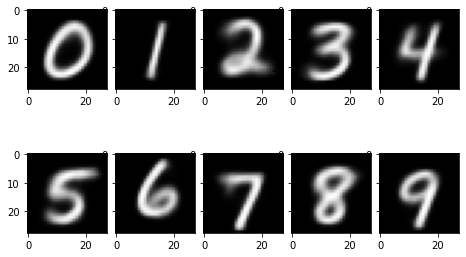

Generation of MNIST represants with latent dimension 4
0.91 | 0.77 | 0.96 | 0.90 | 0.85 | 0.90 | 0.72 | 0.85 | 0.80 | 0.64 |  av = 0.83

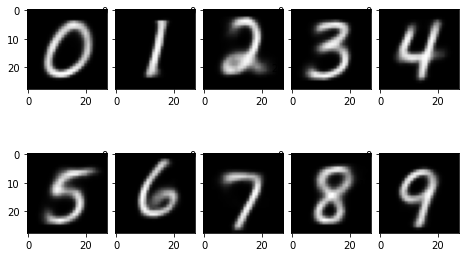

Generation of MNIST represants with latent dimension 8
0.98 | 0.72 | 0.94 | 0.98 | 0.86 | 0.95 | 0.94 | 0.93 | 0.88 | 0.83 |  av = 0.90

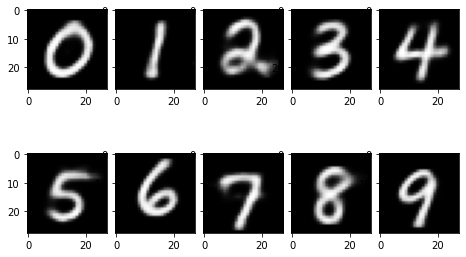

Generation of MNIST represants with latent dimension 16
0.97 | 0.83 | 0.98 | 0.95 | 0.93 | 0.94 | 0.90 | 0.90 | 0.78 | 0.71 |  av = 0.89

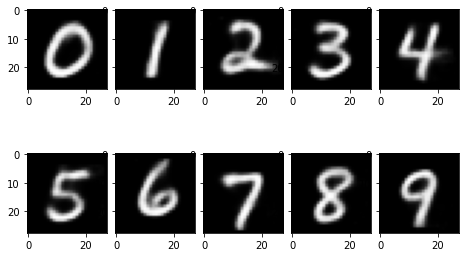

Generation of MNIST represants with latent dimension 32
0.98 | 0.76 | 0.95 | 0.94 | 0.89 | 0.94 | 0.92 | 0.90 | 0.80 | 0.76 |  av = 0.88

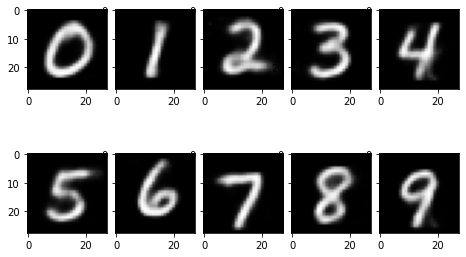

Generation of MNIST represants with latent dimension 64
0.97 | 0.80 | 0.97 | 0.94 | 0.89 | 0.92 | 0.89 | 0.91 | 0.81 | 0.70 |  av = 0.88

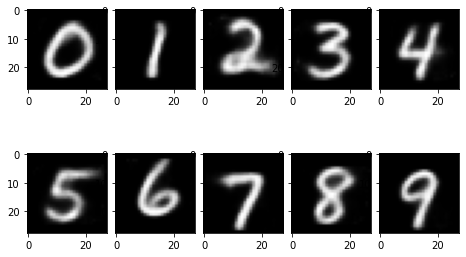

Generation of MNIST represants with latent dimension 128
0.97 | 0.79 | 0.95 | 0.95 | 0.89 | 0.94 | 0.88 | 0.88 | 0.75 | 0.66 |  av = 0.86

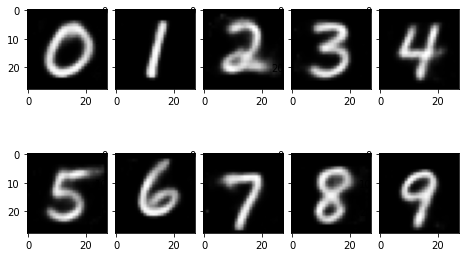

Generation of MNIST represants with latent dimension 256
0.96 | 0.73 | 0.93 | 0.94 | 0.88 | 0.92 | 0.87 | 0.84 | 0.77 | 0.68 |  av = 0.85

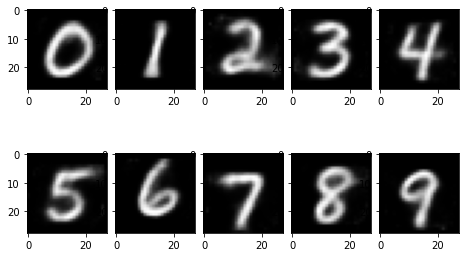

In [6]:
for i in range(len(LATENT_DIM)):
    probabs = []
    for digit in range(N_CLASSES):
        z = torch.zeros(1,LATENT_DIM[i]).to(device)
        y = onehotmixer(digit)
        z = torch.cat((z, y), dim=1)
        with torch.no_grad():
            reconstructed_img = models[i].decoder(z)    
            logps = classifier(reconstructed_img.view(1,INPUT_DIM).data)
            
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        img = reconstructed_img.view(28, 28).data
        probabs.append(max(probab))
        plt.subplot(2, N_CLASSES/2, 1 + digit)
        plt.imshow(img, cmap = plt.cm.gray)
    print(f'Generation of MNIST represants with latent dimension {2**(i+1)}')
    list_print(probabs)

    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    plt.show()

In [7]:
def representant(number,size=10,range=RANGE, result=False):
    best_p = 0
    best_img = 0 
    for c1 in torch.linspace(-range,range,size):
        for c2 in torch.linspace(-range,range,size): 
            z = latent_vector(c1,c2).to(device)
            y = onehotmixer(number).to(device)
            z = torch.cat((z, y), dim=1)
            with torch.no_grad():
                reconstructed_img = cvae_z2.decoder(z)   
                logps = classifier(reconstructed_img.view(1,INPUT_DIM).data) 
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
                
            if max(probab) > best_p :
                best_p = max(probab)
                best_img = reconstructed_img.view(28, 28).data 

    if result:
        return best_img, best_p

Generation of MNIST represants according to classifier with latent dim = 2
0.99 | 0.93 | 0.97 | 0.97 | 0.98 | 0.98 | 0.92 | 0.93 | 0.93 | 0.86 |  av = 0.95

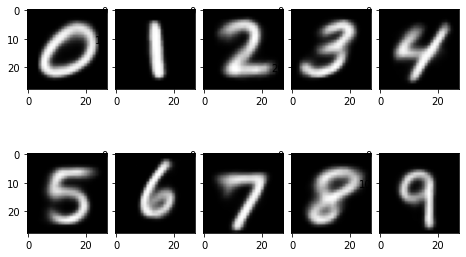

In [8]:
probabs = []
for digit in range(N_CLASSES):
    img,probab = representant(digit,result=True)
    probabs.append(probab)
    plt.subplot(2, N_CLASSES/2, 1 + digit)
    plt.imshow(img, cmap = plt.cm.gray)
print(f'Generation of MNIST represants according to classifier with latent dim = {2}')
list_print(probabs)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
plt.show()


Generation of counterfactuals using a conditional and moving around in latent space 

In [9]:
def cft_gen_single(number,model,latent_dim,size=10,range=2*RANGE,confidence=0.6, show=True):
    counterfacts = []
    for c1 in torch.linspace(-range,range,size):
        for c2 in torch.linspace(-range,range,size):
            z = latent_vector(c1,c2,latent_dim).to(device)
            z = z.to(device)
            y = onehotmixer(number)
            z = torch.cat((z, y), dim=1)

            with torch.no_grad():
                reconstructed_img = model.decoder(z)    
                logps = classifier(reconstructed_img.view(1,INPUT_DIM).data)
            
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            if max(probab) > confidence and pred_label!=number :
                print(" Predicted as "+ str(pred_label) +" with probability:"+
                    "{:.2f}".format(max(probab)))
                img = reconstructed_img.view(28, 28).data
                counterfacts.append(img)

    if show and len(counterfacts)>0 : 
        print(f'Using conditional = {number}')
        img_it=1
        for img in counterfacts : 
            lenght = len(counterfacts)
            if len(counterfacts) > 3:
                lenght = int(len(counterfacts)**(1/2)) +1
            
            plt.subplot(lenght,lenght,img_it)
            img_it+=1 
            plt.imshow(img, cmap = plt.cm.gray)
        plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=.2)
        plt.show()
    return counterfacts

Generation of counterfactuals by moving according around in dim = 2 latent space 
 Predicted as 1 with probability:0.64
Using conditional = 2


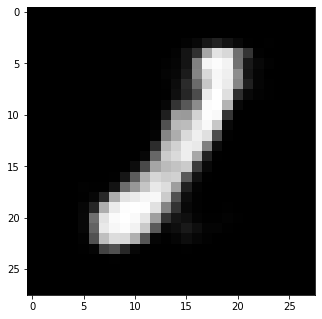

 Predicted as 1 with probability:0.69
 Predicted as 1 with probability:0.81
 Predicted as 1 with probability:0.70
Using conditional = 4


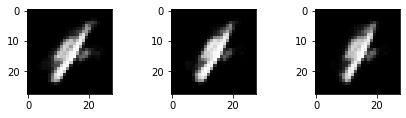

Generation of counterfactuals by moving according around in dim = 4 latent space 
Generation of counterfactuals by moving according around in dim = 8 latent space 
 Predicted as 7 with probability:0.70
 Predicted as 7 with probability:0.85
 Predicted as 7 with probability:0.84
 Predicted as 7 with probability:0.78
 Predicted as 7 with probability:0.68
 Predicted as 7 with probability:0.61
 Predicted as 7 with probability:0.77
 Predicted as 7 with probability:0.87
 Predicted as 7 with probability:0.84
 Predicted as 7 with probability:0.73
 Predicted as 7 with probability:0.64
 Predicted as 7 with probability:0.70
 Predicted as 7 with probability:0.72
 Predicted as 7 with probability:0.69
 Predicted as 7 with probability:0.62
Using conditional = 9


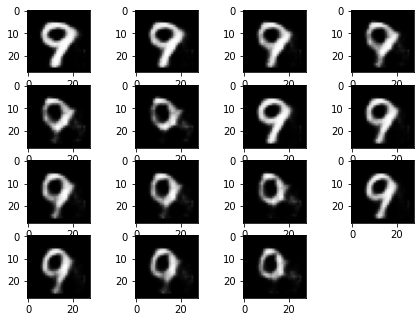

Generation of counterfactuals by moving according around in dim = 16 latent space 
Generation of counterfactuals by moving according around in dim = 32 latent space 
Generation of counterfactuals by moving according around in dim = 64 latent space 
Generation of counterfactuals by moving according around in dim = 128 latent space 
Generation of counterfactuals by moving according around in dim = 256 latent space 


In [10]:
# Generation of counterfactuals using a regular conditional 
# and moving around latent space... The results are as expected, mediocre. 
#Need to find an efficient and REAL way to move around latent space >2
for i in range(len(LATENT_DIM)):
    print(f'Generation of counterfactuals by moving according around in dim = {2**(i+1)} latent space ')
    for digit in [2,4,5,7,9]: 
        cft_gen_single(digit,models[i],LATENT_DIM[i])

Generation of counterfactuals by mixing conditionals and moving around the cross latent space.  

In [11]:
def DEC_gen(number1,number2,latent_dim, model,size=5) :
    img_it = 0
    print(f'Generating a {number1} (blue) and a {number2} (gray) ' )
    for i in range(size**2):
            z = torch.randn((1,latent_dim)).to(device)
            y = onehotmixer(number1,number2,True)
            z = torch.cat((z, y), dim=1)

            with torch.no_grad():
                reconstructed_img = model.decoder(z)    
                logps = classifier(reconstructed_img.view(1,INPUT_DIM).data)
            
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            #print("Predicted as "+ str(pred_label) +" with probability:"+ "{:.2f}".format(max(probab)))
            img = reconstructed_img.view(28, 28).data

            plt.subplot(size, size, 1 + img_it)
            img_it +=1
            if pred_label == number1 : 
                plt.imshow(img, cmap = plt.cm.Blues)
            else:
                plt.imshow(img, cmap = plt.cm.gray)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=.2)
    plt.show()

def ENC_DEC_gen(img,C1,C2):
    img = img.view(-1, 28 * 28)
    img = img.to(device)

    C1 = onehotmixer(C1)
    C1 = C1.to(device)

    

    C2 = onehotmixer(C2)
    C2 = C2.to(device)

    with torch.no_grad(): 
        reconstructed_x, _, _ = cvae(img,C1,C2)

    return reconstructed_x


    TO DEBUG 

    



In [12]:
def ENC_DEC_gen(img,C1,C2,model,classif=False):

    img = img.view(-1, 28 * 28)
    img = img.to(device)

    C1 = onehotmixer(C1)
    C1 = C1.to(device)

    x = torch.cat((img, C1), dim=1)

    # encode
    with torch.no_grad():
        z_mu, z_var = model.encoder(x)

    # sample from the distribution having latent parameters z_mu, z_var
    # reparameterize
    std = torch.exp(z_var / 2)
    eps = torch.randn_like(std)
    x_sample = eps.mul(std).add_(z_mu)

    C2 = onehotmixer(C2)
    C2 = C2.to(device)
    z = torch.cat((x_sample, C2), dim=1)

    # decode
    with torch.no_grad():
        generated_x = model.decoder(z)
        logps = classifier(generated_x.view(1,INPUT_DIM).data)
    if classif :         
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        print("Predicted as "+ str(pred_label) +" with probability:"+ "{:.2f}".format(max(probab)))
    img = generated_x.view(28, 28).data

    return img

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.98 | pred : 4 : 0.98 | pred : 9 : 0.82 | pred : 9 : 0.80 | 

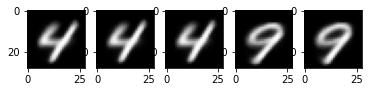

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.98 | pred : 4 : 0.89 | pred : 9 : 0.90 | pred : 9 : 0.70 | 

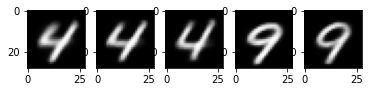

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.99 | pred : 4 : 0.94 | pred : 9 : 0.93 | pred : 9 : 0.87 | 

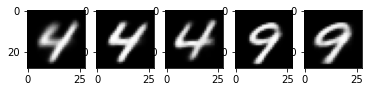

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.98 | pred : 4 : 0.91 | pred : 9 : 0.82 | pred : 9 : 0.52 | 

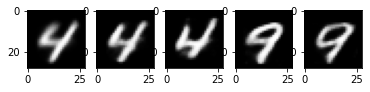

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.99 | pred : 4 : 0.92 | pred : 9 : 0.88 | pred : 4 : 0.83 | 

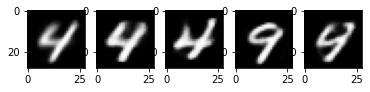

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.99 | pred : 4 : 0.98 | pred : 9 : 0.84 | pred : 4 : 0.82 | 

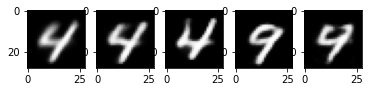

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.98 | pred : 4 : 0.96 | pred : 9 : 0.76 | pred : 4 : 0.53 | 

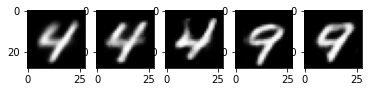

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=4 C'=9
pred : 4 : 0.98 | pred : 4 : 0.99 | pred : 4 : 0.91 | pred : 9 : 0.84 | pred : 9 : 0.67 | 

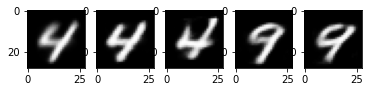

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.85 | pred : 9 : 0.86 | pred : 4 : 0.84 | pred : 4 : 0.80 | 

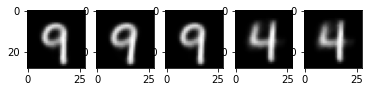

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.88 | pred : 9 : 0.89 | pred : 4 : 0.86 | pred : 4 : 0.87 | 

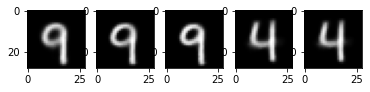

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.89 | pred : 9 : 0.91 | pred : 4 : 0.88 | pred : 4 : 0.83 | 

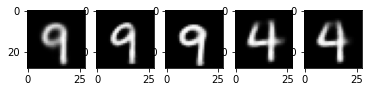

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.81 | pred : 9 : 0.35 | pred : 4 : 0.96 | pred : 4 : 0.77 | 

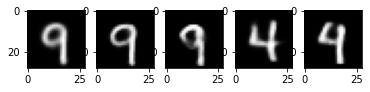

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.90 | pred : 9 : 0.82 | pred : 4 : 0.87 | pred : 4 : 0.51 | 

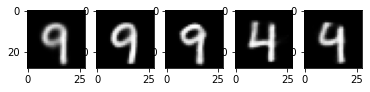

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.81 | pred : 9 : 0.86 | pred : 4 : 0.89 | pred : 9 : 0.60 | 

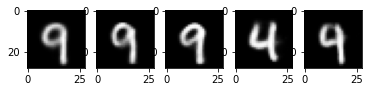

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.87 | pred : 9 : 0.61 | pred : 4 : 0.80 | pred : 9 : 0.56 | 

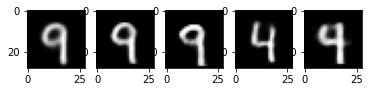

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=9 C'=4
pred : 9 : 0.86 | pred : 9 : 0.87 | pred : 9 : 0.87 | pred : 4 : 0.73 | pred : 4 : 0.56 | 

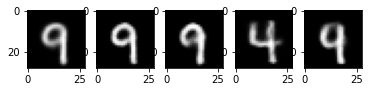

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.86 | pred : 9 : 0.85 | pred : 7 : 0.86 | pred : 7 : 0.82 | 

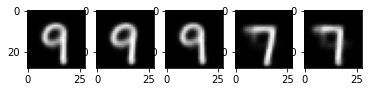

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.87 | pred : 9 : 0.86 | pred : 7 : 0.78 | pred : 7 : 0.71 | 

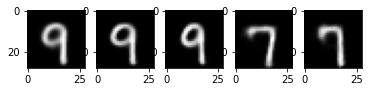

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.89 | pred : 9 : 0.75 | pred : 7 : 0.85 | pred : 9 : 0.49 | 

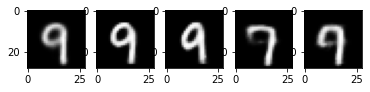

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.85 | pred : 9 : 0.91 | pred : 7 : 0.82 | pred : 7 : 0.34 | 

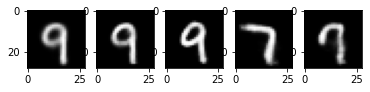

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.93 | pred : 9 : 0.92 | pred : 7 : 0.63 | pred : 4 : 0.44 | 

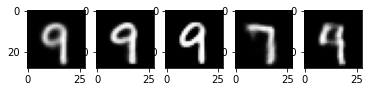

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.78 | pred : 9 : 0.94 | pred : 7 : 0.81 | pred : 9 : 0.72 | 

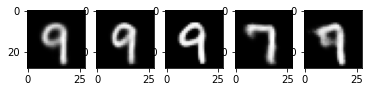

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.86 | pred : 9 : 0.88 | pred : 7 : 0.62 | pred : 9 : 0.79 | 

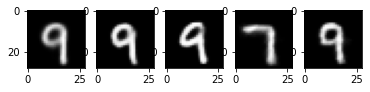

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=9 C'=7
pred : 9 : 0.86 | pred : 9 : 0.84 | pred : 9 : 0.93 | pred : 7 : 0.72 | pred : 9 : 0.76 | 

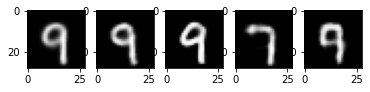

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.86 | pred : 9 : 0.83 | pred : 8 : 0.88 | pred : 8 : 0.91 | 

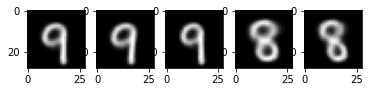

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.89 | pred : 9 : 0.65 | pred : 8 : 0.78 | pred : 8 : 0.80 | 

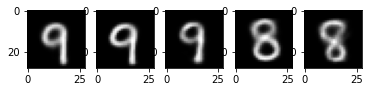

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.91 | pred : 9 : 0.60 | pred : 8 : 0.76 | pred : 8 : 0.52 | 

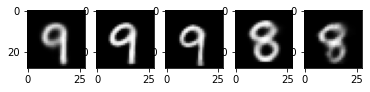

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.85 | pred : 9 : 0.79 | pred : 8 : 0.80 | pred : 9 : 0.58 | 

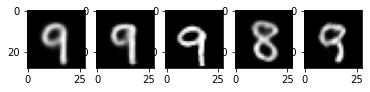

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.84 | pred : 9 : 0.83 | pred : 8 : 0.91 | pred : 9 : 0.71 | 

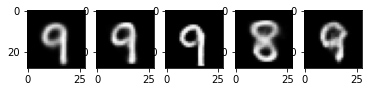

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.74 | pred : 9 : 0.90 | pred : 8 : 0.89 | pred : 9 : 0.52 | 

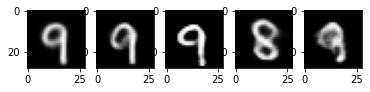

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.86 | pred : 9 : 0.80 | pred : 8 : 0.86 | pred : 9 : 0.36 | 

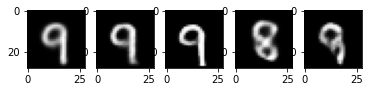

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=9 C'=8
pred : 9 : 0.86 | pred : 9 : 0.89 | pred : 9 : 0.81 | pred : 8 : 0.90 | pred : 9 : 0.49 | 

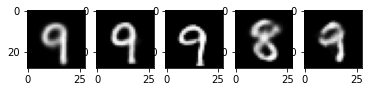

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.90 | pred : 8 : 0.90 | pred : 9 : 0.78 | pred : 9 : 0.80 | 

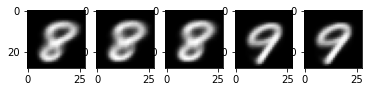

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.93 | pred : 8 : 0.93 | pred : 9 : 0.80 | pred : 9 : 0.74 | 

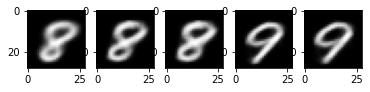

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.95 | pred : 8 : 0.89 | pred : 9 : 0.89 | pred : 9 : 0.74 | 

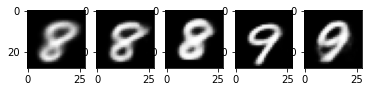

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.85 | pred : 8 : 0.97 | pred : 9 : 0.38 | pred : 8 : 0.67 | 

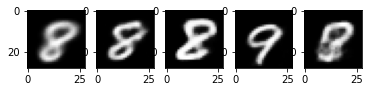

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.93 | pred : 8 : 0.93 | pred : 9 : 0.67 | pred : 8 : 0.65 | 

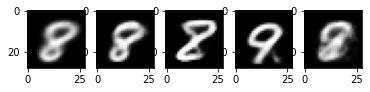

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.85 | pred : 8 : 0.97 | pred : 9 : 0.79 | pred : 8 : 0.93 | 

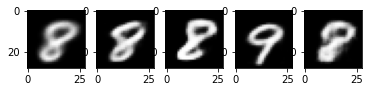

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.96 | pred : 8 : 0.89 | pred : 9 : 0.79 | pred : 8 : 0.79 | 

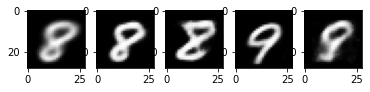

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=8 C'=9
pred : 8 : 0.93 | pred : 8 : 0.97 | pred : 8 : 0.95 | pred : 9 : 0.73 | pred : 8 : 0.70 | 

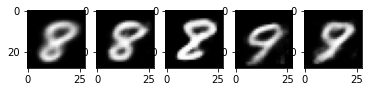

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.97 | pred : 3 : 0.95 | pred : 5 : 0.95 | pred : 5 : 0.94 | 

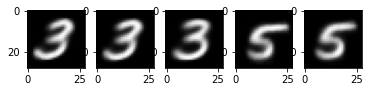

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.98 | pred : 3 : 0.98 | pred : 5 : 0.97 | pred : 5 : 0.95 | 

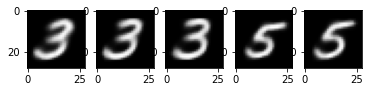

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.99 | pred : 3 : 0.99 | pred : 5 : 0.96 | pred : 5 : 0.97 | 

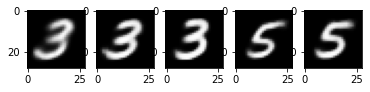

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.98 | pred : 3 : 1.00 | pred : 5 : 0.95 | pred : 5 : 0.51 | 

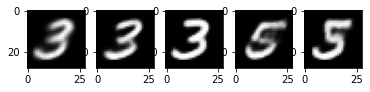

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.99 | pred : 3 : 1.00 | pred : 5 : 0.98 | pred : 3 : 0.93 | 

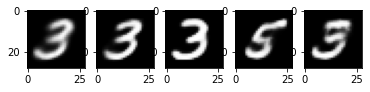

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.98 | pred : 3 : 1.00 | pred : 5 : 0.92 | pred : 3 : 0.96 | 

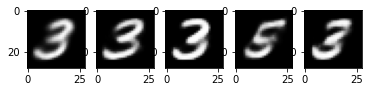

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.98 | pred : 3 : 1.00 | pred : 5 : 0.95 | pred : 3 : 0.99 | 

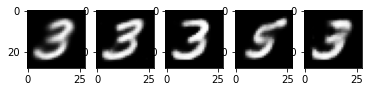

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=3 C'=5
pred : 3 : 0.97 | pred : 3 : 0.98 | pred : 3 : 1.00 | pred : 5 : 0.96 | pred : 3 : 0.95 | 

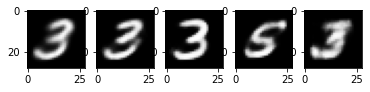

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =2 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.97 | pred : 5 : 0.96 | pred : 3 : 0.94 | pred : 3 : 0.95 | 

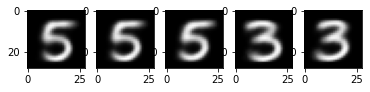

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =4 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.97 | pred : 5 : 0.97 | pred : 3 : 0.96 | pred : 3 : 0.97 | 

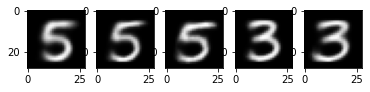

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =8 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.98 | pred : 5 : 0.95 | pred : 3 : 0.98 | pred : 3 : 0.94 | 

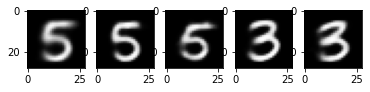

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =16 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.97 | pred : 5 : 0.99 | pred : 3 : 0.98 | pred : 5 : 0.62 | 

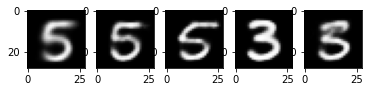

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =32 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.99 | pred : 5 : 0.99 | pred : 3 : 0.97 | pred : 5 : 0.76 | 

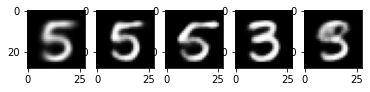

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =64 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.98 | pred : 5 : 0.99 | pred : 3 : 0.99 | pred : 3 : 0.66 | 

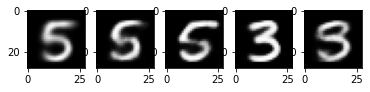

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =128 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.98 | pred : 5 : 0.99 | pred : 3 : 0.98 | pred : 5 : 0.46 | 

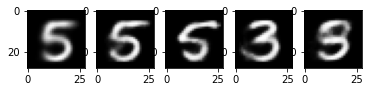

    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim =256 C=5 C'=3
pred : 5 : 0.98 | pred : 5 : 0.99 | pred : 5 : 0.99 | pred : 3 : 0.97 | pred : 3 : 0.72 | 

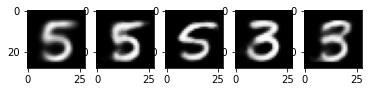

In [13]:
#Im thinking, the latent space is too small. The decoder gets influenced by the conditional too much
predict = False 
representants = []
for i in range(10):
    img, _ = representant(i,result=True)
    representants.append(img)

n = [4,9,9,4,9,7,9,8,8,9,3,5,5,3]
for i in range(0,len(n),2):
    for m in range(len(models)):
        imgs = []
        imgs.append(representants[n[i]])
        imgs.append(ENC_DEC_gen(representants[n[i]],n[i],n[i],models[m],predict))
        imgs.append(ENC_DEC_gen(representants[n[i]],n[i+1],n[i],models[m],predict)) 
        imgs.append(ENC_DEC_gen(representants[n[i]],n[i],n[i+1],models[m],predict))
        imgs.append(ENC_DEC_gen(representants[n[i]],n[i+1],n[i+1],models[m],predict))
        probabs = []
        classifs = []
        for j in range(len(imgs)): 
            with torch.no_grad():
                logps = classifier(imgs[j].view(1,INPUT_DIM))         
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            probabs.append(max(probab))
            classifs.append(pred_label)
        print("    ORIGINAL    |   ENC-DEC C C   |   ENC-DEC C' C  |   ENC-DEC C C'  |   ENC-DEC C' C' | L_dim ="+str(LATENT_DIM[m])+" C="+str(n[i])+" C'="+str(n[i+1]))
        list_print(probabs,classifs)
        for j in range(len(imgs)):
            plt.subplot(1,len(imgs),1+j)
            plt.imshow(imgs[j],cmap='gray')
        plt.show()